Project by: Michael Yisa

Introduction:
The following dataset was aquired from (https://www.kaggle.com/datasets/geomack/spotifyclassification) Kaggle. 
It is a dataset of 2017 songs with attributes from Spotify's API. (application programming interface)
The user discovered that spotify's API gives users the ability to download a song’s audio features. 
These features includes attributes such as a song’s tempo, level of acousticness, and how danceable a song is.
The user created two playlists on Spotify. One for songs they liked and another for songs they didn't like.
The user proceeded to gather the initial dataset from Spotify's API. 
They joined the date from both playlists and added a seperate target column that denotes whether they liked a song or not.
The goal of our project is to predict whether or not the user liked a given song and to see which of the features are the most informative.


METADATA:

FUN FACT** - Spotify comes from two words, "Spot" and "identify"
Acousticness— The acoustic measure the track with values between 0.0 (low confidence) and 1.0 (high confidence).
Danceability— The danceability measure of the track has values between 0.0 and 1.0.
Duration_ms— The duration of the track in milliseconds.
Energy—  The energy measure of the track has values from 0.0 to 1.0.
Instrumentalness— The instrumental measure of the track has values from 0.0 to 1.0.
Key— The key of the track.
Liveness— The probability of liveness for the track having values between 0.0 and 1.0.
Loudness— The loudness measure of the track has values between -60 and 0 dB.
mode— The modality (major or minor) of a track having values from 0 (Minor) to 1 (Major).
Speechiness— The probability of speech existence in the track.
Tempo— The tempo of a track in beats per minute (BPM).
Time_signature— The time signature of a track.
valence — The probability of musical positiveness from the track having values between 0.0 and 1.0.
Target — Target values for the track - 0 (Others) and 1 (Favourites).
Song_Title — The title of the song.
Artist — The artist of the song.
Note: for scale 0 and 1, The closer the value is to zero the least result and the closer the value is to 1 the higher the variable performs.

Importing Modules and files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objs as go #This will be used for detailed bar graphs

%matplotlib inline
sns.set()


In [2]:
df= pd.read_csv('Spot_data.csv')
df2= pd.read_csv("Spot_data.csv")

Descriptives

In [3]:
df.head() #This is used to peak into our data set 

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

In [4]:
df.describe() #This is used to view statistical details

Unnamed: 0  acousticness  danceability   duration_ms       energy  \
count  2017.000000   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean   1008.000000      0.187590      0.618422  2.463062e+05     0.681577   
std     582.402066      0.259989      0.161029  8.198181e+04     0.210273   
min       0.000000      0.000003      0.122000  1.604200e+04     0.014800   
25%     504.000000      0.009630      0.514000  2.000150e+05     0.563000   
50%    1008.000000      0.063300      0.631000  2.292610e+05     0.715000   
75%    1512.000000      0.265000      0.738000  2.703330e+05     0.846000   
max    2016.000000      0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.000000     2.000000     0.092300    -8.394000     0.000000   
50%            0.000076     6.000000     0.127000    -6.248000     1.000000   
75%            0.054000     9.000000     0.247000    -4.746000     1.000000   
max            0.976000    11.000000     0.969000    -0.307000     1.000000   

       speechiness        tempo  time_signature      valence       target  
count  2017.000000  2017.000000     2017.000000  2017.000000  2017.000000  
mean      0.092664   121.603272        3.968270     0.496815     0.505702  
std       0.089931    26.685604        0.255853     0.247195     0.500091  
min       0.023100    47.859000        1.000000     0.034800     0.000000  
25%       0.037500   100.189000        4.000000     0.295000     0.000000  
50%       0.054900   121.427000        4.000000     0.492000     1.000000  
75%       0.108000   137.849000        4.000000     0.691000     1.000000  
max       0.816000   219.331000        5.000000     0.992000     1.000000

In [5]:
df.info

<bound method DataFrame.info of       Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [8]:
df.nunique() #Checking for unique value 

Unnamed: 0          2017
acousticness        1394
danceability         632
duration_ms         1921
energy               719
instrumentalness    1107
key                   12
liveness             793
loudness            1808
mode                   2
speechiness          792
tempo               1919
time_signature         4
valence              853
target                 2
song_title          1956
artist              1343
dtype: int64

In [9]:
df.value_counts("target")

target
1    1020
0     997
Name: count, dtype: int64

In [10]:
df.value_counts('mode')

mode
1    1235
0     782
Name: count, dtype: int64

Data cleaning

In [11]:
# checking for null
# df.isnull().value.any()
pd.isnull(df).sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [13]:
# Drop Unamed
df.drop('Unnamed: 0', inplace=True, axis=1)

In [16]:
# Convert the duration from Millisecond to seconds 
df["duration"] = df["duration_ms"].apply(lambda x: round(x/1000))
df.drop("duration_ms", inplace=True, axis=1)
# drops duration_ms column

In [17]:
df.head()

acousticness  danceability  energy  instrumentalness  key  liveness  \
0        0.0102         0.833   0.434          0.021900    2    0.1650   
1        0.1990         0.743   0.359          0.006110    1    0.1370   
2        0.0344         0.838   0.412          0.000234    2    0.1590   
3        0.6040         0.494   0.338          0.510000    5    0.0922   
4        0.1800         0.678   0.561          0.512000    5    0.4390   

   loudness  mode  speechiness    tempo  time_signature  valence  target  \
0    -8.795     1       0.4310  150.062             4.0    0.286       1   
1   -10.401     1       0.0794  160.083             4.0    0.588       1   
2    -7.148     1       0.2890   75.044             4.0    0.173       1   
3   -15.236     1       0.0261   86.468             4.0    0.230       1   
4   -11.648     0       0.0694  174.004             4.0    0.904       1   

       song_title            artist  duration  
0        Mask Off            Future       205  
1         Redbone  Childish Gambino       327  
2    Xanny Family            Future       186  
3  Master Of None       Beach House       199  
4  Parallel Lines       Junior Boys       393

 Exploratory Data Analysis


<function matplotlib.pyplot.show(close=None, block=None)>

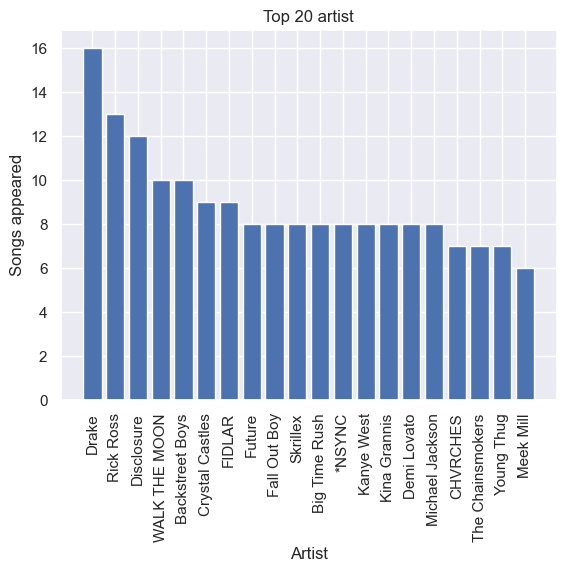

In [23]:
#Extracts the top 20 most frquent values from 'artist' coulumn
values = df['artist'].value_counts().tolist()[:20]
#Extracts the names of the top 20 most frequent artist from the 'artist' column
names = list(dict(df['artist'].value_counts()).keys())[:20]

fig, ax = plt.subplots()
plt.xticks(rotation = 'vertical')
plt.xlabel("Artist")
plt.ylabel("Songs appeared")
plt.title("Top 20 artist")
ax.bar(names,values)
plt.show

<Axes: xlabel='target', ylabel='count'>

<Figure size 1600x1600 with 0 Axes>

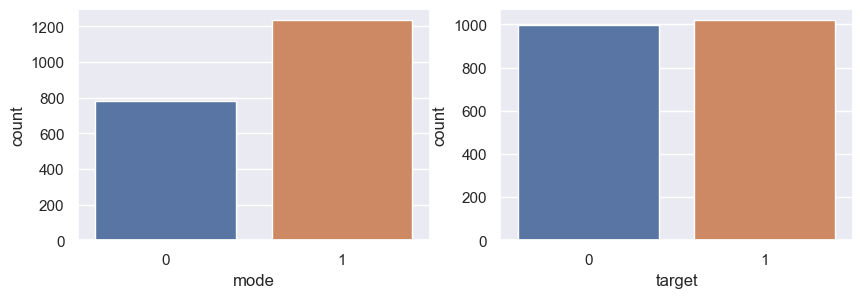

In [34]:
import warnings 

#ignore all future warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
plt.figure(figsize=(16,16))
fig = plt.figure(figsize=(10,3)) #specifies figure of 1000x300
fig.add_subplot(1,2,1) #subplot of 1 row 2 coulumns and index 1
sns.countplot(x=df['mode']) #seaborn count plot using mode as argument

fig.add_subplot(1,2,2)
sns.countplot(x=df['target'])

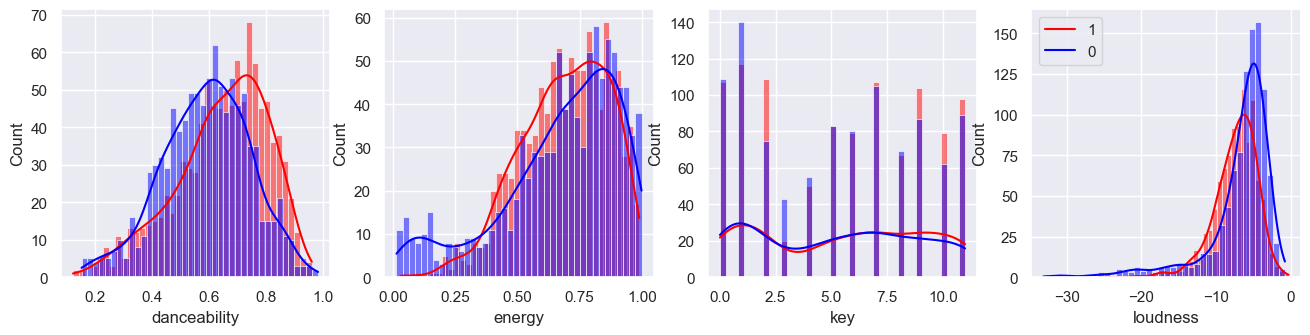

In [35]:
import warnings 

#ignore all future warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(df[df['target']==1]['danceability'], color='red', bins=40, kde=True)
sns.histplot(df[df['target']==0]['danceability'], color='blue', bins=40, kde=True)
plt.subplot(4,4,2)
sns.histplot(df[df['target']==1]['energy'], color='red', bins=40, kde=True)
sns.histplot(df[df['target']==0]['energy'], color='blue', bins=40, kde=True)
plt.subplot(4,4,3)
sns.histplot(df[df['target']==1]['key'], color='red', bins=40, kde=True)
sns.histplot(df[df['target']==0]['key'], color='blue', bins=40, kde=True)
plt.subplot(4,4,4)
sns.histplot(df[df['target']==1]['loudness'], color='red', bins=40, kde=True)
sns.histplot(df[df['target']==0]['loudness'], color='blue', bins=40, kde=True)
plt.legend((1,0))

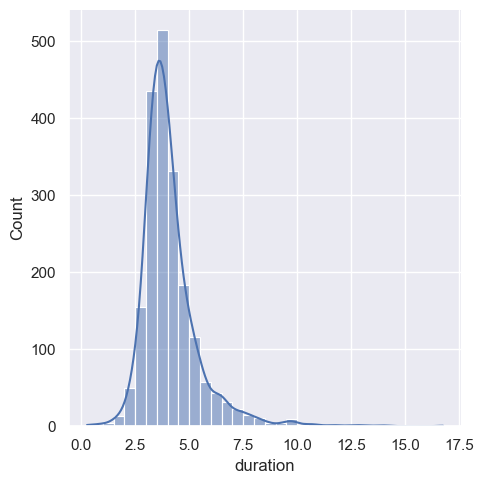

In [36]:
#Plot the distribution based on time(in minutes)

sns.displot(df.duration/60,bins=np.arange(1,12,0.5), kde=True)

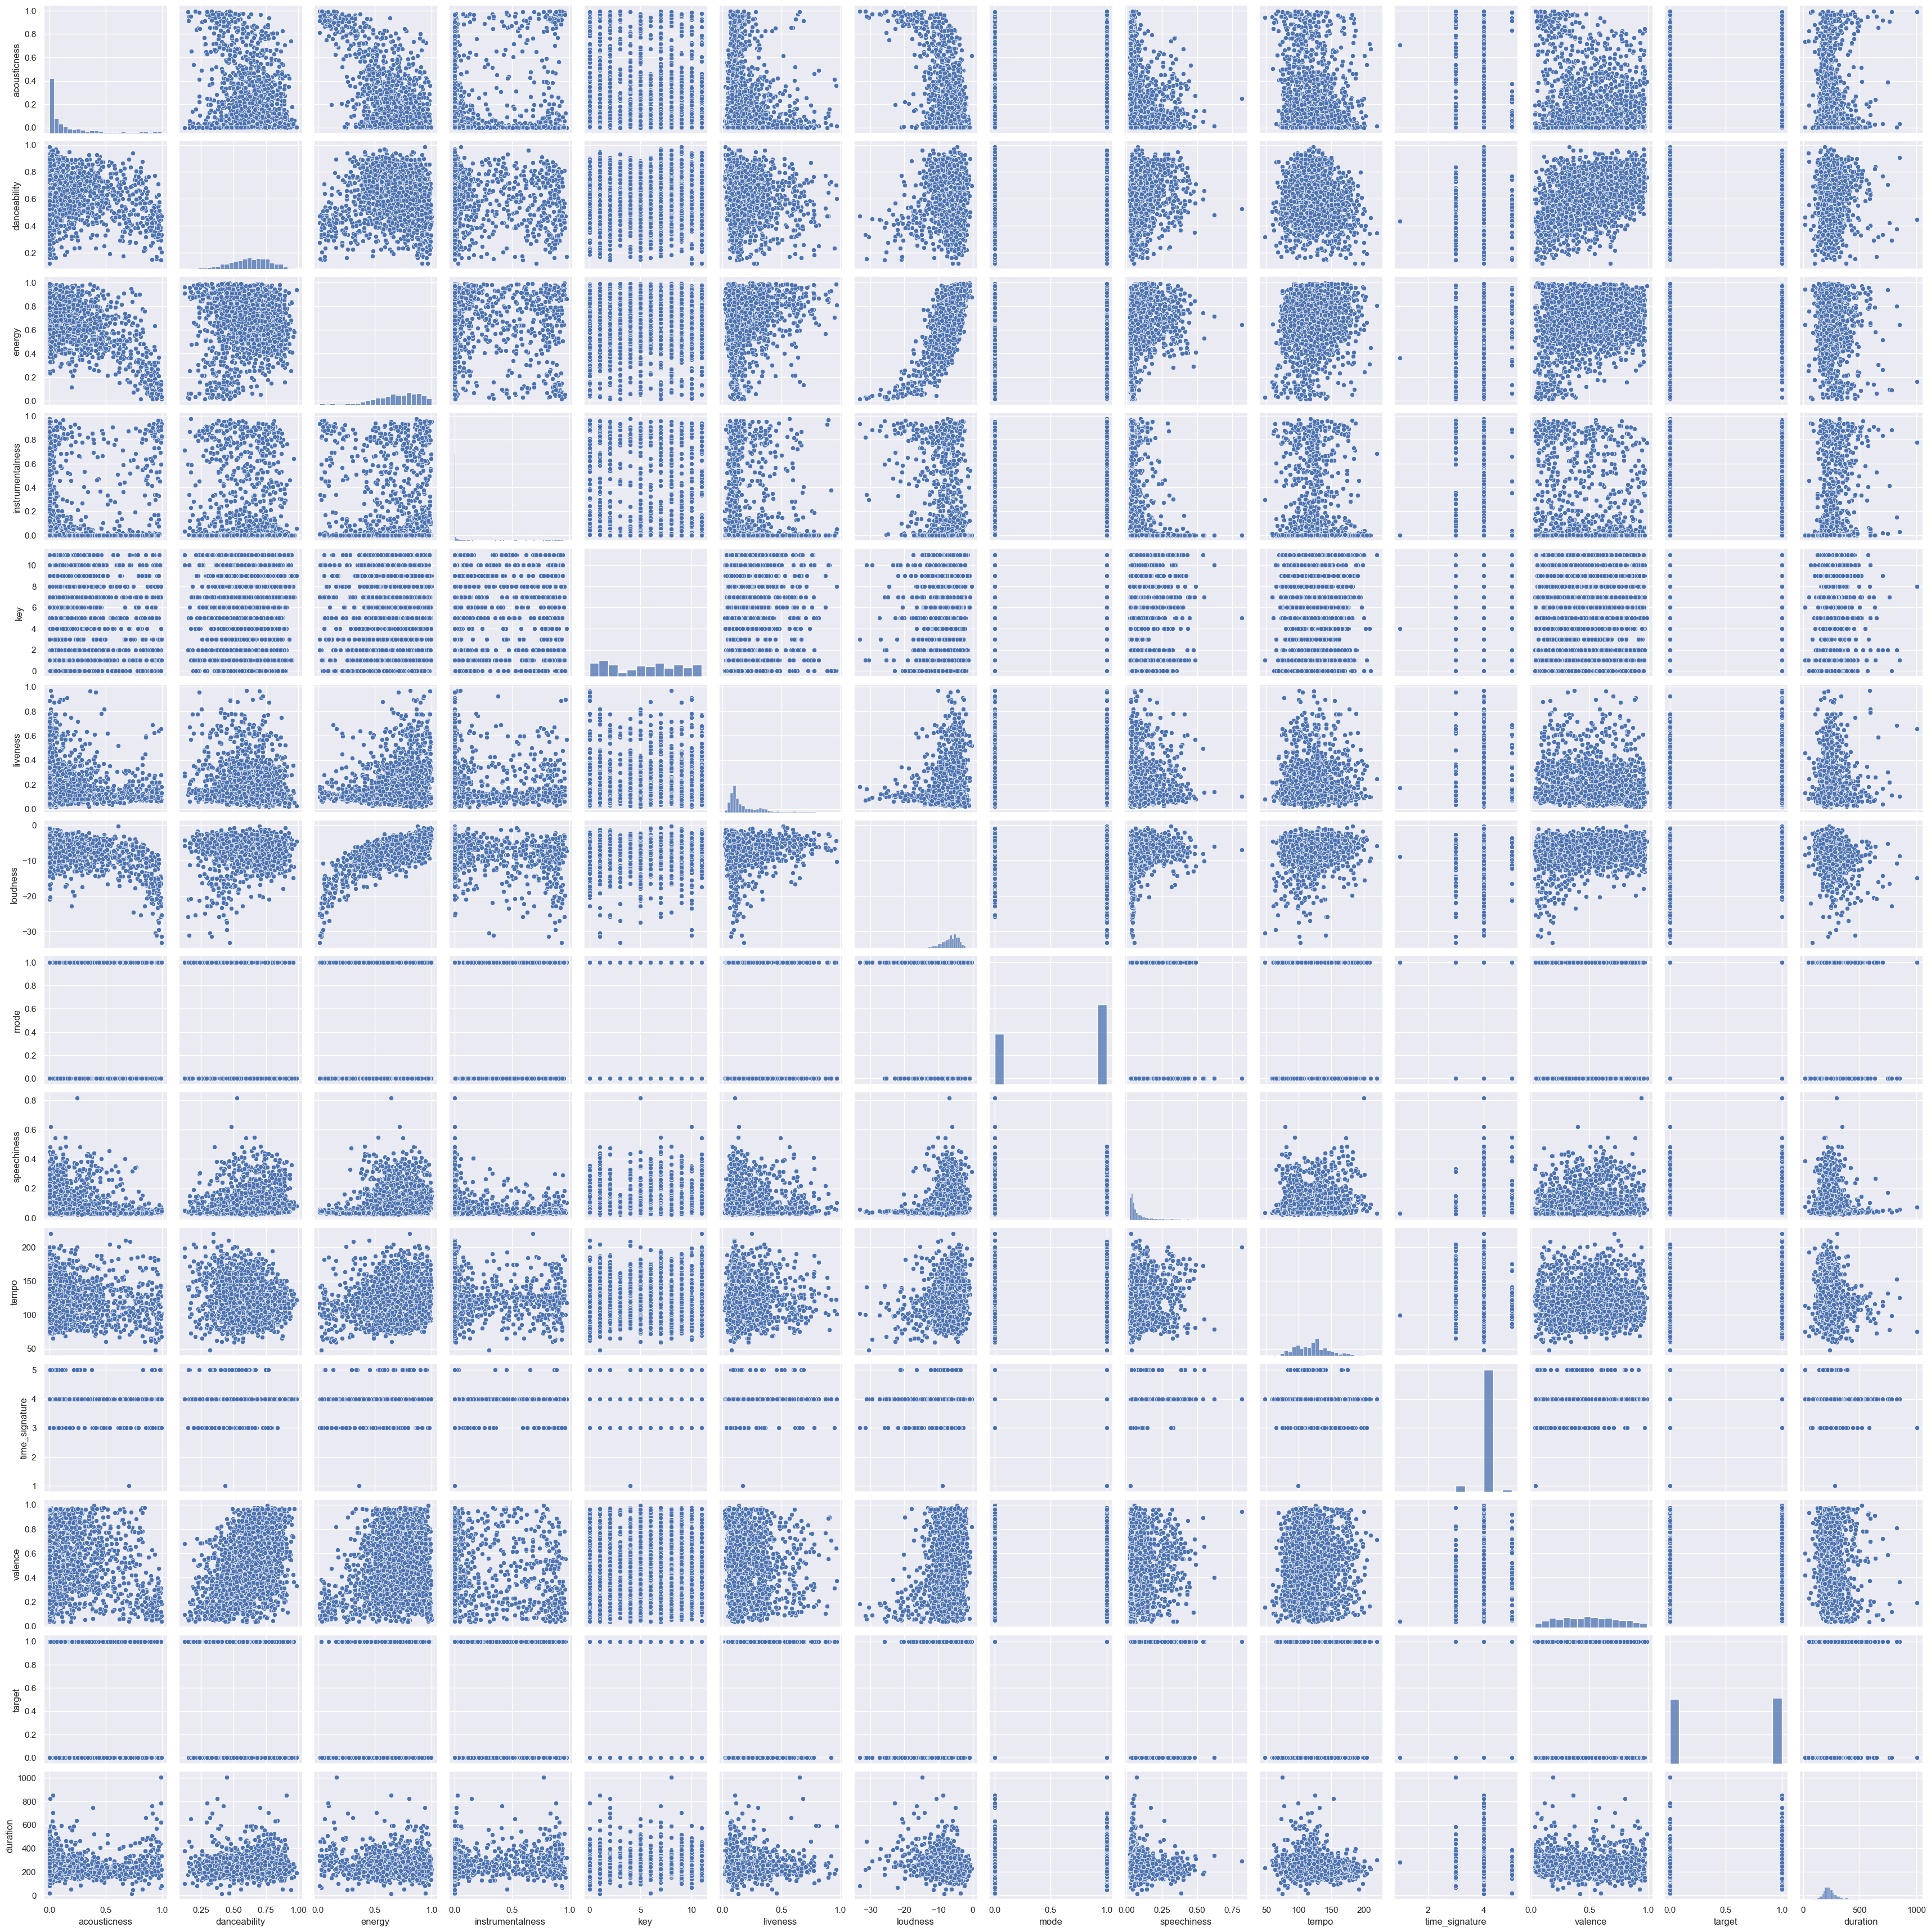

In [37]:
sns.pairplot(df)

In [39]:
print('hello')

hello


<Axes: >

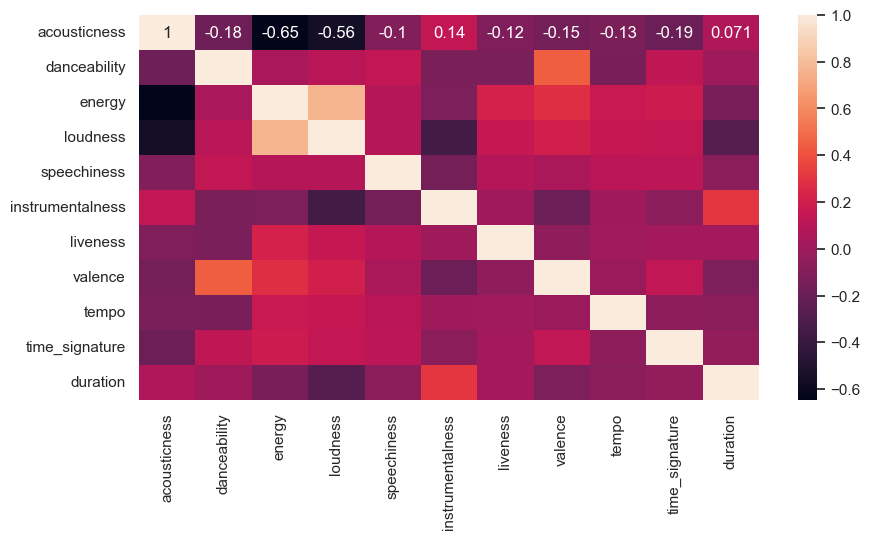

In [40]:
fig = plt.figure(figsize=(10,5))
corr = df[['acousticness','danceability','energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'valence',  'tempo','time_signature','duration']].corr()
sns.heatmap(corr, annot=True)

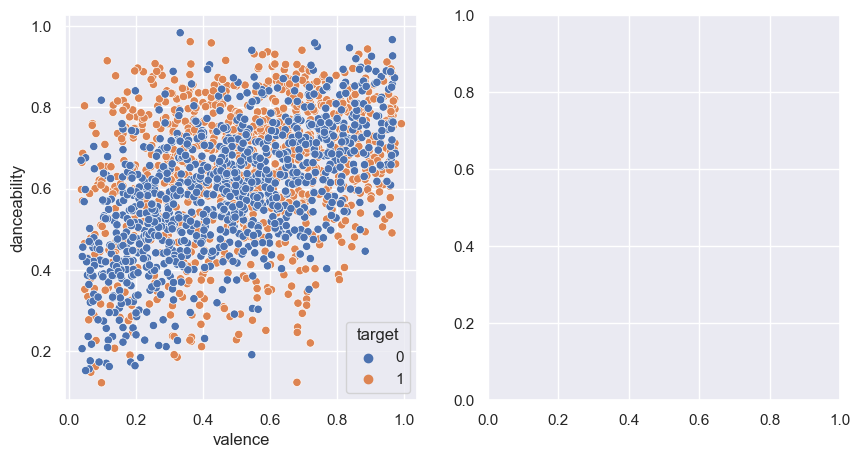

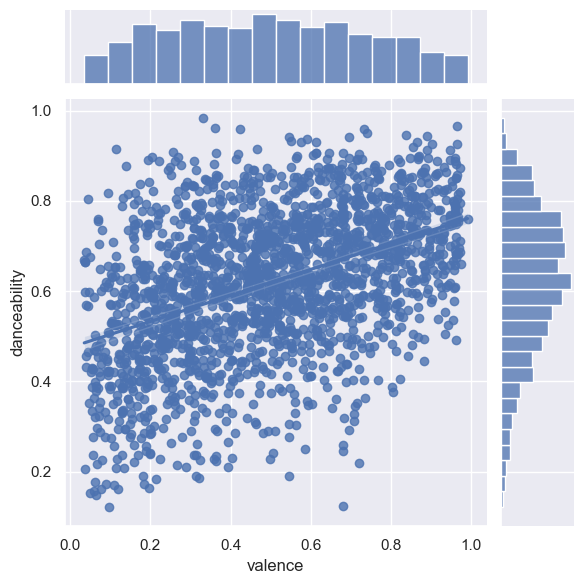

In [42]:
#Valcence vs danceability
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.scatterplot(data=df, x="valence", y="danceability",hue='target')

fig.add_subplot(1,2,2)
sns.JointGrid(x="valence", y="danceability", data=df).plot(sns.regplot, sns.histplot)

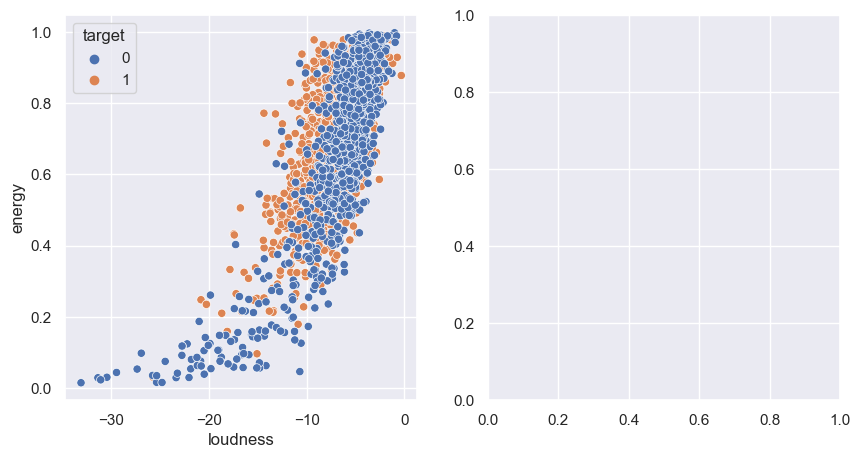

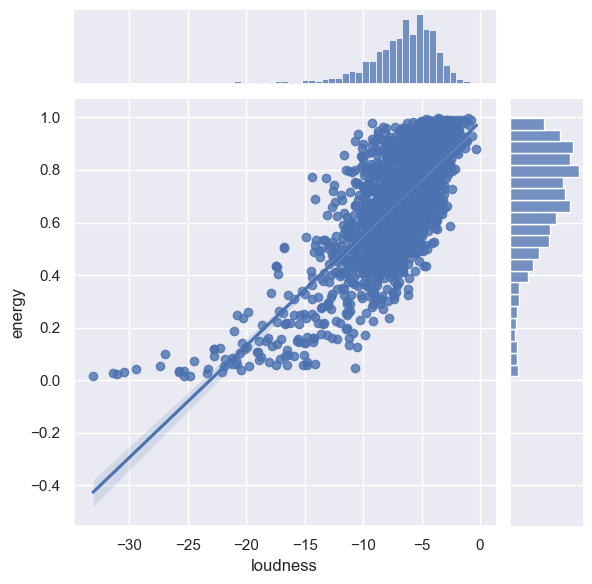

In [45]:
#energy vs loudness
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.scatterplot(data=df, x="loudness", y="energy",hue='target')

fig.add_subplot(1,2,2)
sns.JointGrid(x="loudness", y="energy", data=df).plot(sns.regplot, sns.histplot)

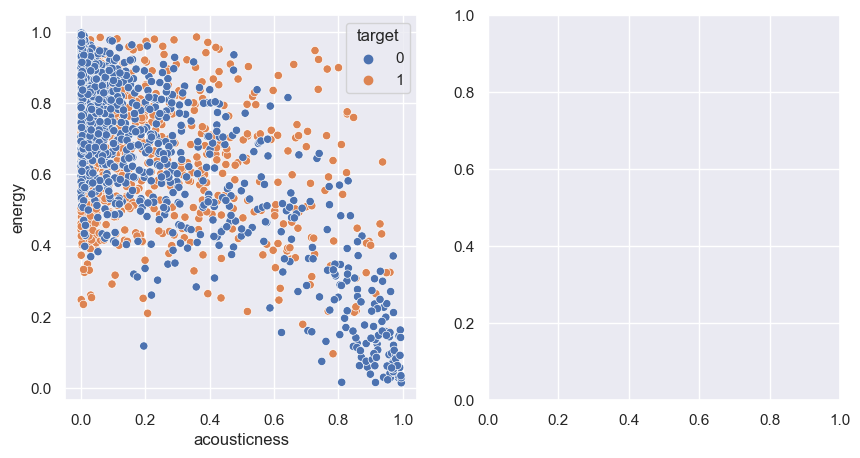

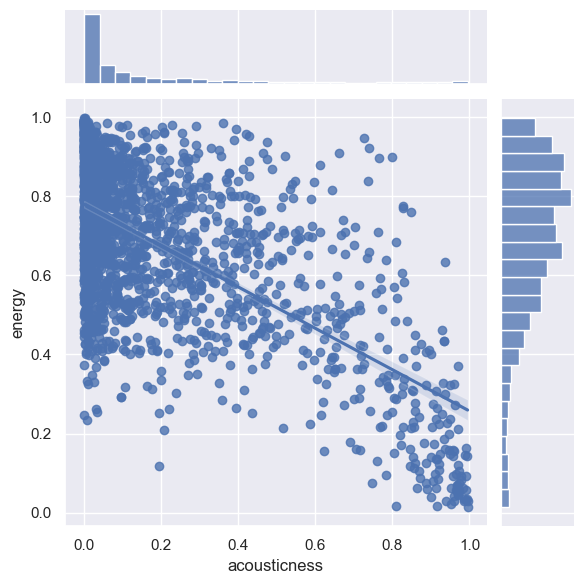

In [46]:
#energy vs acousticness
#this plot visualized the relationship between energy and acousticness in the dataset
#each point represents a song colored by its target value
fig=plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
sns.scatterplot(data=df, x="acousticness", y="energy",hue='target')

fig.add_subplot(1,2,2)
sns.JointGrid(x="acousticness", y="energy", data=df).plot(sns.regplot, sns.histplot)



MODEL BUILDING

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [48]:
#Standardization helps in improving the performace and convergance speed of gradient-based algortithms 
#The StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler= StandardScaler()

In [50]:
#dropping non numerical columns 'song_title' and 'artist' as they are not needed for scaling
df_scalPrep=df.drop(['song_title', 'artist'],axis=1)

#fitting the standardscaler to the feature excluding the target variable
#this computes the mean and standard deviation used for later scaling
scaler.fit(df_scalPrep.drop("target", axis=1))

#tranforming the features using the fitted scaler the data to have a mean of 0 and a nstandard deviation of 1.
scaled_feat= scaler.transform(df_scalPrep.drop('target',axis=1))

In [51]:
df_feat=pd.DataFrame(scaled_feat, columns=df_scalPrep.columns[:-1])

df_feat.head()

acousticness  danceability    energy  instrumentalness       key  liveness  \
0     -0.682467      1.332874 -1.177700         -0.407864 -0.916446 -0.166291   
1      0.043897      0.773830 -1.534468         -0.465683 -1.190619 -0.346454   
2     -0.589363      1.363932 -1.282352         -0.487200 -0.916446 -0.204897   
3      1.602040     -0.772860 -1.634363          1.379429 -0.093928 -0.634715   
4     -0.029201      0.370075 -0.573574          1.386753 -0.093928  1.596735   

   loudness      mode  speechiness     tempo  time_signature   valence  \
0 -0.454530  0.795738     3.763084  1.066709        0.124048 -0.853039   
1 -0.881573  0.795738    -0.147529  1.442323        0.124048  0.368970   
2 -0.016586  0.795738     2.183712 -1.745166        0.124048 -1.310280   
3 -2.167220  0.795738    -0.740350 -1.316964        0.124048 -1.079636   
4 -1.213155 -1.256696    -0.258753  1.964120        0.124048  1.647627   

     target  
0 -0.503797  
1  0.984562  
2 -0.735591  
3 -0.576995  
4  1.789741

In [52]:
X_train, X_test, y_train, y_test= train_test_split(scaled_feat, df['target'], test_size= 0.35)

K-Nearest neighbor machine learning model

In [55]:
#Initialize the K-Nearest Neighbor classifier
#n_neighbors=1: Number of neighbors to use, in this case, 1 
# metric = 'minikowski': this is a distance metric to use (generaliztion of Eucidean and Manhattan distances)
#p=2: parameter for minikowski metric, when p=2 it is equivenlant to the eulidean distance

knn = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski', p=2)

#Fit the model using the training data
#x_train: training feature set
#y_train: training labels

knn.fit(X_train, y_train)

#Makes predictions using the test data
predictions= knn.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
#PRINTING CLASSIFICATION REPORT
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[237 100]
 [145 224]]
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       337
           1       0.69      0.61      0.65       369

    accuracy                           0.65       706
   macro avg       0.66      0.66      0.65       706
weighted avg       0.66      0.65      0.65       706



In [63]:
error_rate =[] #Empty list

for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i= knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

Text(0, 0.5, 'Error Rate')

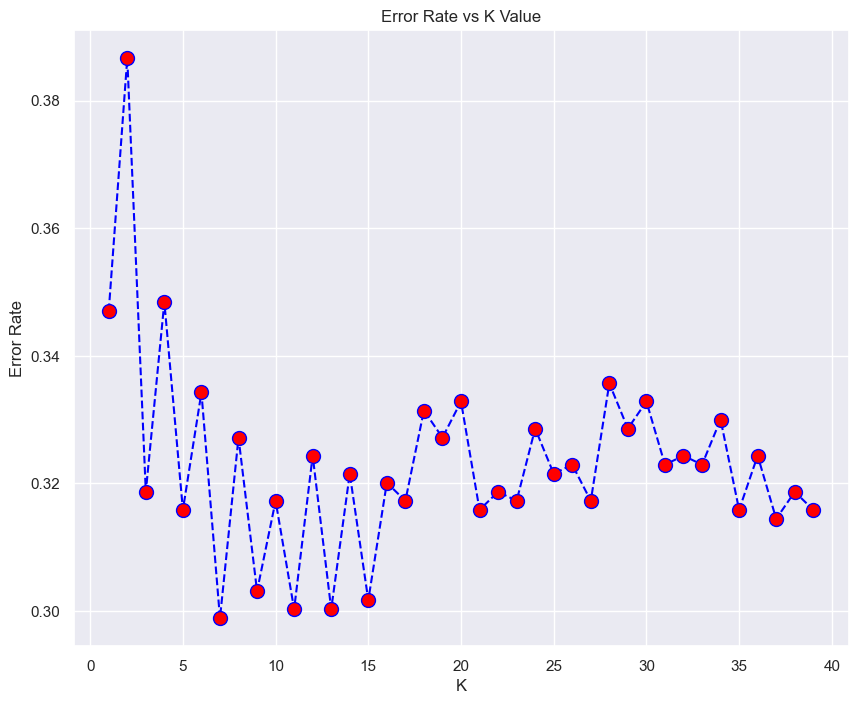

In [64]:
plt.figure(figsize=(10,8))

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [67]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions= knn.predict(X_test)

print("With K=5")
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

With K=5


[[273  64]
 [159 210]]


              precision    recall  f1-score   support

           0       0.63      0.81      0.71       337
           1       0.77      0.57      0.65       369

    accuracy                           0.68       706
   macro avg       0.70      0.69      0.68       706
weighted avg       0.70      0.68      0.68       706



RANDOM FOREST

In [68]:
from sklearn.ensemble import RandomForestClassifier

Text(0, 0.5, 'Testing Accuracy')

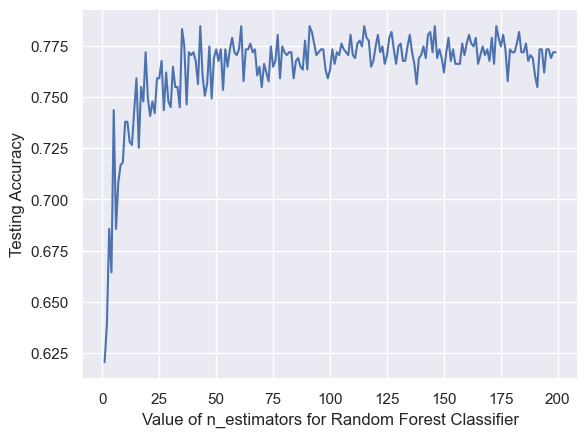

In [69]:
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [71]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
rd_pred=rf.predict(X_test)

In [73]:
print(confusion_matrix(y_test,rd_pred))
print("\n")
print(classification_report(y_test,rd_pred))

[[266  71]
 [100 269]]


              precision    recall  f1-score   support

           0       0.73      0.79      0.76       337
           1       0.79      0.73      0.76       369

    accuracy                           0.76       706
   macro avg       0.76      0.76      0.76       706
weighted avg       0.76      0.76      0.76       706



RECOMMENDER SYSTEMS

In [85]:
# Recommending Similar songs
df2.head()

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  
0       1        Mask Off            Future  
1       1         Redbone  Childish Gambino  
2       1    Xanny Family            Future  
3       1  Master Of None       Beach House  
4       1  Parallel Lines       Junior Boys

In [102]:
# Print the column names to check the actual names
print(df2.columns)

# Drop the non-numeric columns (assuming 'song_title' and 'artist' are their names)
df2_features = df2.drop(columns=['song_title', 'artist'])

# Ensure all columns are numeric
df2_features = df2_features.apply(pd.to_numeric, errors='coerce')

# Check for NaN values
print(df2_features.isna().sum())

# Fill NaN values with the mean of the respective columns
df2_features = df2_features.fillna(df2_features.mean())

# Ensure the DataFrame is not empty
print(df2_features.shape)

# Check again for NaN values
print(df2_features.isna().sum())

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64
(2017, 14)
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64


In [103]:
 # Compute the cosine similarity matrix
cosine_sim = cosine_similarity(df2_features)

In [104]:
def get_recommendations(song_index, cosine_sim=cosine_sim, df=df2):
    # Get the pairwise similarity scores for the given song
    sim_scores = list(enumerate(cosine_sim[song_index]))
    
    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]
    
    # Get the song indices
    song_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar songs
    return df.iloc[song_indices]

# Example usage
song_index = 2  # Example song index
similar_songs = get_recommendations(song_index)
print(similar_songs)

      acousticness  danceability  duration_ms  energy  instrumentalness  key  \
593       0.091200         0.748       275907   0.703          0.003600    2   
988       0.208000         0.514       233818   0.632          0.013200    2   
1899      0.250000         0.580       235173   0.575          0.000018    3   
486       0.000299         0.697       238206   0.680          0.006740    2   
1846      0.413000         0.625       270333   0.426          0.000000    2   
991       0.020800         0.869       233787   0.687          0.000001    1   
547       0.017500         0.726       190360   0.664          0.000000    0   
1358      0.328000         0.680       231679   0.593          0.000000    1   
1664      0.029400         0.591       228347   0.649          0.000000    3   
1817      0.828000         0.717       260187   0.320          0.000000    3   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
593     0.0635   -11.869     1       0

In this project, we successfully built a recommender system that suggests similar songs based on their acoustic features using cosine similarity. We utilized the following steps to achieve this:

Data Preparation:
Ensured the data was clean and numeric, and prepared it for analysis.
Excluded non-numeric columns such as song titles and artist names from the similarity calculation.
Feature Engineering:
Focused on song attributes such as acousticness, danceability, energy, and more to capture the essence of each song.
Model Implementation:
Employed cosine similarity to measure the similarity between songs.
Recommendation Generation:
Developed a function to recommend songs based on their similarity to a given song.
This recommender system can be further improved by incorporating user preferences, listening history, and more sophisticated algorithms like collaborative filtering or deep learning techniques. This project demonstrates the foundational approach to building a content-based recommendation system and showcases the importance of data preparation and feature engineering in creating effective recommendations.